In [5]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
mesh_box = o3d.geometry.TriangleMesh.create_box(0.4, 0.4, 0.05)
mesh_box.translate([-0.2, -0.2, -0.05])
mesh_box.compute_vertex_normals()
mesh_box.compute_triangle_normals()
mesh_box2 = o3d.geometry.TriangleMesh.create_box(0.4, 0.4, 0.05)
mesh_box2.translate([-0.2, -0.2, 0.1])
mesh_box2.compute_vertex_normals()
mesh_box2.compute_triangle_normals()

TriangleMesh with 8 points and 12 triangles.

In [6]:
scene = o3d.t.geometry.RaycastingScene()
mesh = o3d.t.geometry.TriangleMesh.from_legacy(mesh_box)
scene.add_triangles(mesh)
mesh2 = o3d.t.geometry.TriangleMesh.from_legacy(mesh_box2)
scene.add_triangles(mesh2)

1

In [7]:
xyz_range = np.linspace(np.array([-0.5,-0.5,-0.5]), np.array([0.5, 0.5, 0.5]), num=128)
query_points = np.stack(np.meshgrid(*xyz_range.T), axis=-1).astype(np.float32)
signed_distance = scene.compute_distance(query_points).numpy()

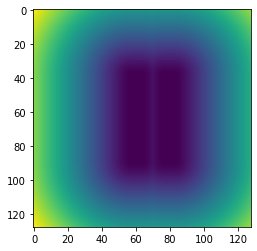

In [8]:
plt.imshow(signed_distance[32,:,:])

(10, 10, 10)